In [1]:
%matplotlib inline

# system
import os

# scipy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

#plt.style.use('seaborn-v0_8-colorblind')
plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

PLOT_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
MODE_SNR            = 'UNIFORM'
CH_TEMPLATE_FLT_STR = 'XY'
MODE_FLT1           = 'OR'
FILTER_TAG          = 'FILTERED'

RES_DIR      = '/sps/grand/pcorrea/nutrig/template/v2/results'
BKG_RES_FILE = os.path.join(RES_DIR,f'bkg_results_{FILTER_TAG}_{MODE_SNR}_template_FLT_CH_{CH_TEMPLATE_FLT_STR}.npz')
SIG_RES_FILE = BKG_RES_FILE.replace('bkg','sig')
BKG_RES_FILE_MINE = BKG_RES_FILE.replace(f'{MODE_SNR}','MINE').replace('FILTERED','RAW')
SIG_RES_FILE_RAW = SIG_RES_FILE.replace('FILTERED','RAW')

SNR_BINS  = np.linspace(3,8,6)
CORR_BINS = np.linspace(0,1,21)

PLOT_TITLE = f'NUTRIG FLT-1 {MODE_SNR}, POL = {CH_TEMPLATE_FLT_STR}, MODE = {MODE_FLT1}'

In [3]:
bkg_res = np.load(BKG_RES_FILE)
sig_res = np.load(SIG_RES_FILE)
bkg_res_mine = np.load(BKG_RES_FILE_MINE)
sig_res_raw = np.load(SIG_RES_FILE_RAW)

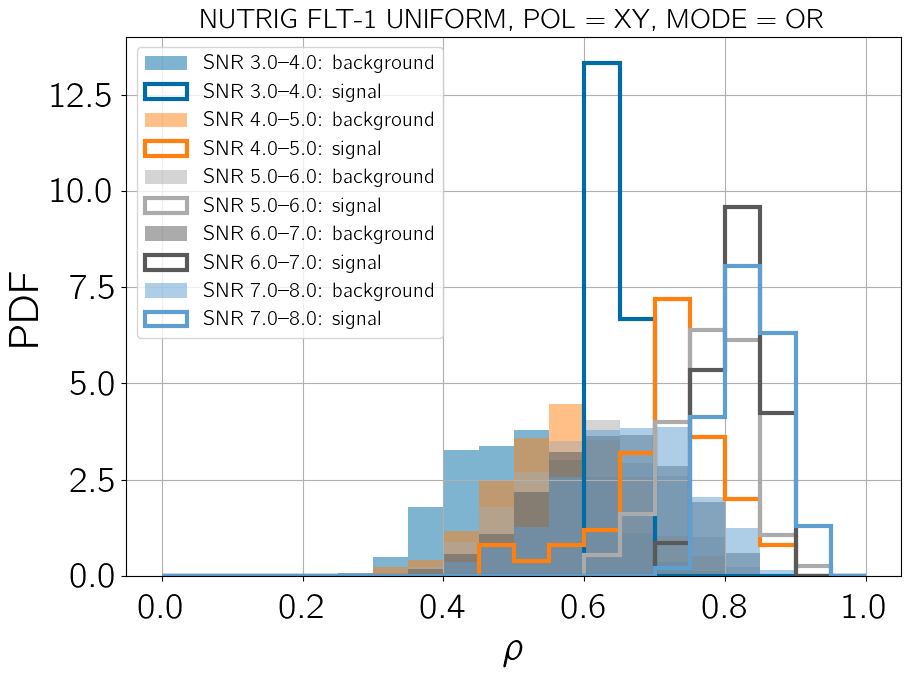

In [4]:
fig, ax = plt.subplots()

for i in range( len(SNR_BINS)-1 ):
    mask_bin_bkg = np.logical_and( bkg_res['snr'] >= SNR_BINS[i], bkg_res['snr'] < SNR_BINS[i+1])
    mask_bin_sig = np.logical_and( sig_res['snr'] >= SNR_BINS[i], sig_res['snr'] < SNR_BINS[i+1])

    label_bkg = f'SNR {SNR_BINS[i]}--{SNR_BINS[i+1]}: background'
    label_sig = f'SNR {SNR_BINS[i]}--{SNR_BINS[i+1]}: signal'

    _, _, patches_bkg = ax.hist(bkg_res['corr_max'][mask_bin_bkg],bins=CORR_BINS,color=PLOT_COLORS[i],density=True,histtype='bar',alpha=.5,label=label_bkg)
    #_, _, patches_bkg = ax.hist(bkg_res['corr_max'][mask_bin_bkg],bins=CORR_BINS,color=PLOT_COLORS[i],density=True,histtype='step',linewidth=3,linestyle='--')
    _, _, patches_sig = ax.hist(sig_res['corr_max'][mask_bin_sig],bins=CORR_BINS,color=PLOT_COLORS[i],density=True,histtype='step',linewidth=3,label=label_sig)

    # for patch in patches_bkg:
    #     patch.set_hatch('\\')

    # for patch in patches_sig:
    #     patch.set_hatch('/')

ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'PDF')

ax.set_title(PLOT_TITLE,fontsize=20)

ax.legend(frameon=True,fontsize=15)

plt.show()

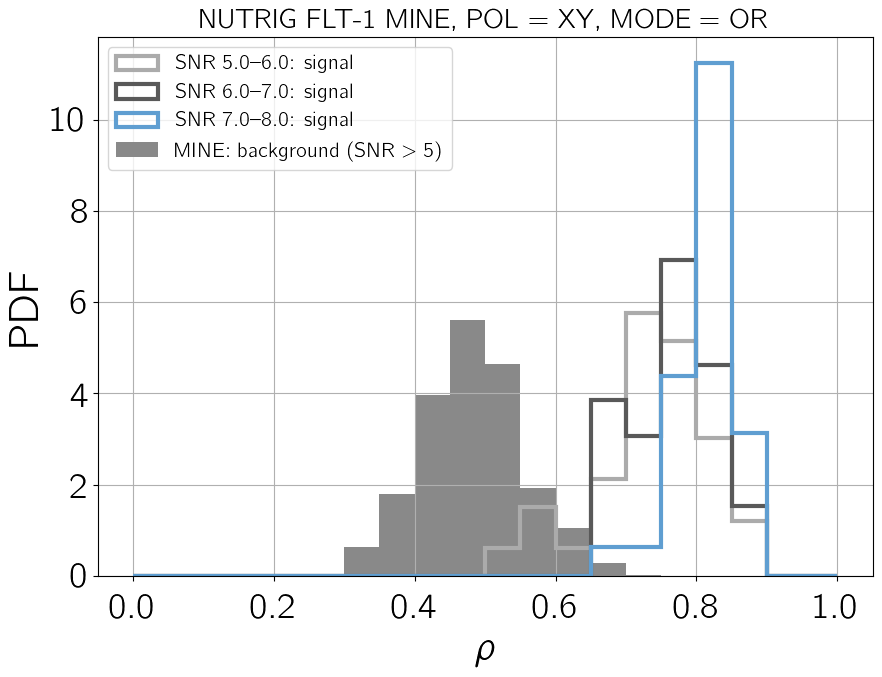

In [7]:
fig, ax = plt.subplots()

for i in range( 2, len(SNR_BINS)-1 ):
    mask_bin_sig = np.logical_and( sig_res_raw['snr'] >= SNR_BINS[i], sig_res_raw['snr'] < SNR_BINS[i+1])

    label_sig = f'SNR {SNR_BINS[i]}--{SNR_BINS[i+1]}: signal'

    #_, _, patches_bkg = ax.hist(bkg_res['corr_max'][mask_bin_bkg],bins=CORR_BINS,color=PLOT_COLORS[i],density=True,histtype='step',linewidth=3,linestyle='--')
    _, _, patches_sig = ax.hist(sig_res_raw['corr_max'][mask_bin_sig],bins=CORR_BINS,color=PLOT_COLORS[i],density=True,histtype='step',linewidth=3,label=label_sig)

ax.hist(bkg_res_mine['corr_max'],bins=CORR_BINS,color=PLOT_COLORS[6],density=True,histtype='bar',linewidth=3,label=r'MINE: background ($\rm SNR > 5$)')

ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'PDF')

ax.set_title(PLOT_TITLE.replace(f'{MODE_SNR}','MINE'),fontsize=20)

ax.legend(frameon=True,fontsize=15)

plt.show()

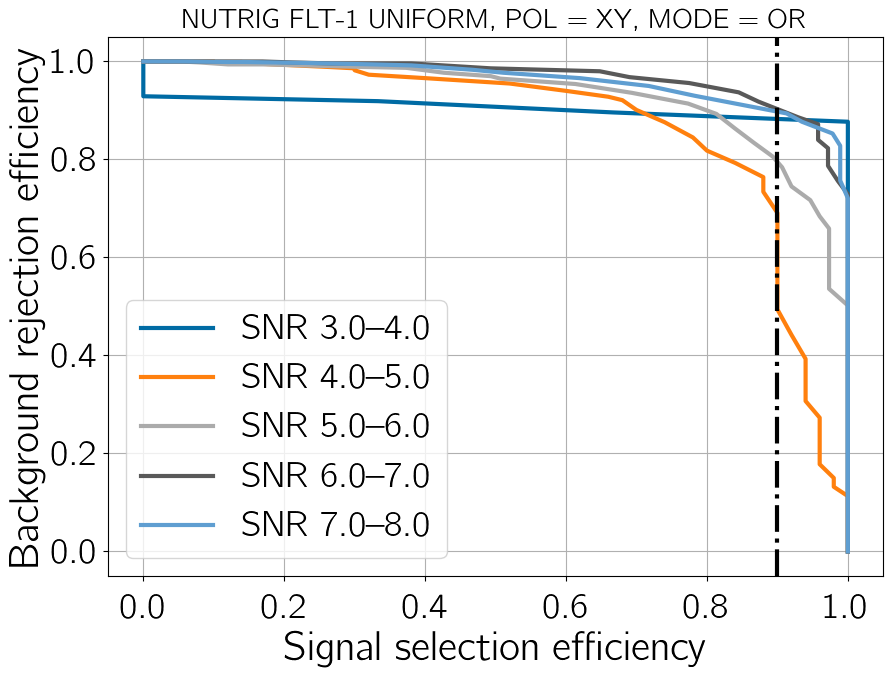

In [6]:
fig, ax = plt.subplots()

corr_range = np.linspace(0,1,101)

for i in range( len(SNR_BINS)-1 ):
    mask_bin_bkg = np.logical_and( bkg_res['snr'] >= SNR_BINS[i], bkg_res['snr'] < SNR_BINS[i+1])
    mask_bin_sig = np.logical_and( sig_res['snr'] >= SNR_BINS[i], sig_res['snr'] < SNR_BINS[i+1])

    bkg_sel_eff = np.ones( corr_range.shape[0] ) / np.sum(mask_bin_bkg)
    sig_sel_eff = np.ones( corr_range.shape[0] ) / np.sum(mask_bin_sig)

    for j, corr_val in enumerate(corr_range):
        bkg_sel_eff[j] *= np.sum(bkg_res['corr_max'][mask_bin_bkg] >= corr_val)
        sig_sel_eff[j] *= np.sum(sig_res['corr_max'][mask_bin_sig] >= corr_val)

    label = f'SNR {SNR_BINS[i]}--{SNR_BINS[i+1]}'
    ax.plot(sig_sel_eff,1-bkg_sel_eff,color=PLOT_COLORS[i],linewidth=3,label=label)

ax.axvline(0.9,color='k',ls='-.')

ax.set_xlabel(r'Signal selection efficiency')
ax.set_ylabel(r'Background rejection efficiency')

ax.set_title(PLOT_TITLE,fontsize=20)

ax.legend(frameon=True)

plt.show()

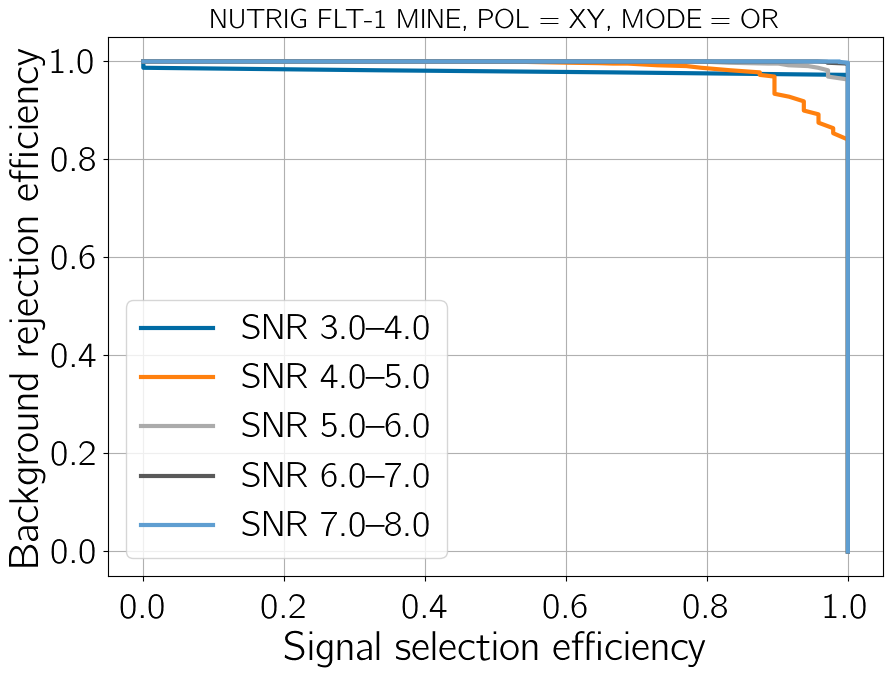

In [14]:
fig, ax = plt.subplots()

corr_range = np.linspace(0,1,101)

for i in range( len(SNR_BINS)-1 ):
    mask_bin_sig = np.logical_and( sig_res['snr'] >= SNR_BINS[i], sig_res['snr'] < SNR_BINS[i+1])

    bkg_sel_eff_mine = np.ones( corr_range.shape[0] ) / len(bkg_res_mine['corr_max'])
    sig_sel_eff      = np.ones( corr_range.shape[0] ) / np.sum(mask_bin_sig)

    for j, corr_val in enumerate(corr_range):
        bkg_sel_eff_mine[j] *= np.sum(bkg_res_mine['corr_max'] >= corr_val)
        sig_sel_eff[j]      *= np.sum(sig_res['corr_max'][mask_bin_sig] >= corr_val)

    label = f'SNR {SNR_BINS[i]}--{SNR_BINS[i+1]}'
    ax.plot(sig_sel_eff,1-bkg_sel_eff_mine,color=PLOT_COLORS[i],linewidth=3,label=label)

ax.set_xlabel(r'Signal selection efficiency')
ax.set_ylabel(r'Background rejection efficiency')

ax.set_title(PLOT_TITLE.replace(f'{MODE_SNR}','MINE'),fontsize=20)

ax.legend(frameon=True)

plt.show()

(array([  3.,   7.,  12.,  72., 131., 388., 463.,  67.,  19.,   6.]),
 array([267. , 269.6, 272.2, 274.8, 277.4, 280. , 282.6, 285.2, 287.8,
        290.4, 293. ]),
 <BarContainer object of 10 artists>)

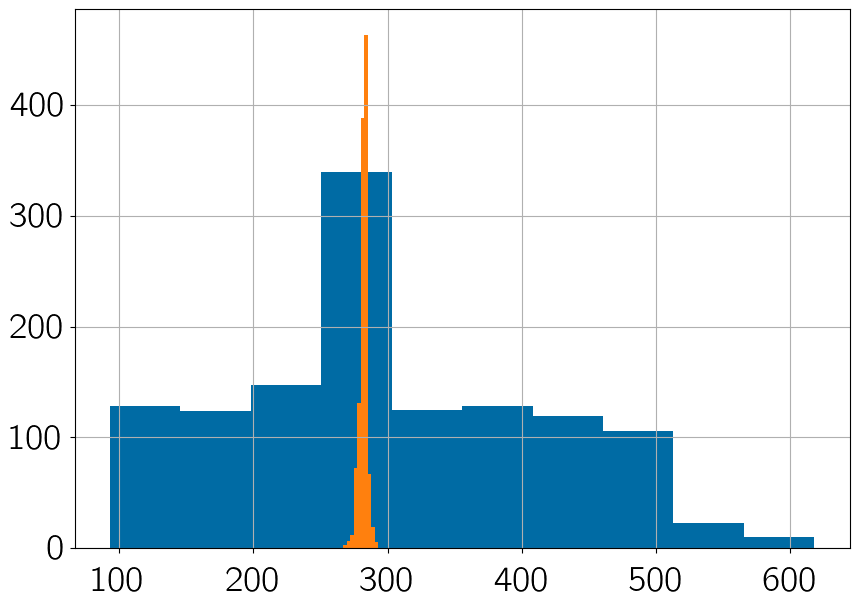

In [12]:
plt.hist(sig_res_raw['time_best'])
plt.hist(bkg_res_mine['time_best'])

Text(0.5, 0, 'SNR')

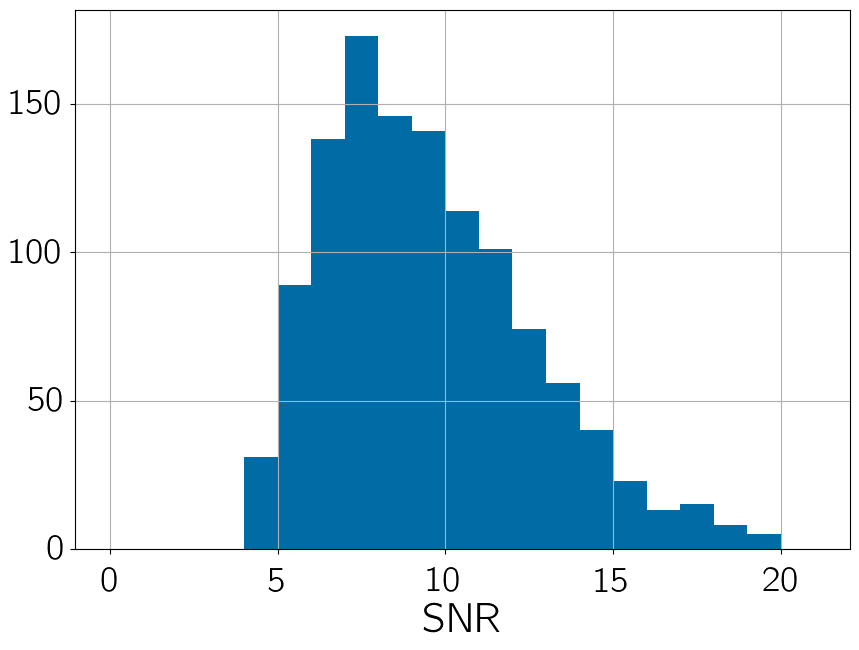

In [28]:
plt.hist(bkg_res_mine['snr'],bins=np.linspace(0,21,22))
plt.xlabel('SNR')